**PROJECT 1 : DRUG PREDICTION USING NAIVE_BAYES ALGORITHM**

**Importing essential Libraries.**

In [105]:
import numpy as np
import pandas as pd

**Loading the Dataset.**

In [106]:
df=pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**Columns of dataset.**

In [107]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

**Datatype of each column.**

In [108]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**Printing First and Last 5 rows.**

In [109]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [110]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


**Shape of Dataset.**

In [111]:
df.shape

(200, 6)

**Checking the number of missing values.**

In [112]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**Droping unnecessary Columns.**

In [113]:
df1=df.drop(['Sex'],axis=1)
df1

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,HIGH,HIGH,25.355,DrugY
1,47,LOW,HIGH,13.093,drugC
2,47,LOW,HIGH,10.114,drugC
3,28,NORMAL,HIGH,7.798,drugX
4,61,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC
196,16,LOW,HIGH,12.006,drugC
197,52,NORMAL,HIGH,9.894,drugX
198,23,NORMAL,NORMAL,14.020,drugX


**Encoding the Dataset**.

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['BP']=le.fit_transform(df1['BP'])
df1['Cholesterol']=le.fit_transform(df1['Cholesterol'])
df1['Na_to_K']=le.fit_transform(df1['Na_to_K'])
df1


,Age,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,167,DrugY
1,47,1,0,89,drugC
2,47,1,0,43,drugC
3,28,2,0,10,drugX
4,61,1,0,133,DrugY
...,...,...,...,...,...
195,56,1,0,69,drugC
196,16,1,0,75,drugC
197,52,2,0,36,drugX
198,23,2,1,102,drugX


**Seperating x as input label and y as output label.**

In [115]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

**Splitting the dataset into Training and Testing Data.**

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Normalizing the Dataset using StandardScaler.**

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.5904632 , -1.07048957, -0.89155583, -0.66463304],
       [ 0.62510743, -1.07048957, -0.89155583,  1.2394508 ],
       [ 1.73289274, -1.07048957, -0.89155583, -1.2394508 ],
       [-0.17495974,  0.12845875, -0.89155583,  0.23351972],
       [ 0.00967114,  1.32740707,  1.12163475, -1.70649024],
       [ 0.93282557, -1.07048957, -0.89155583,  1.25741386],
       [ 0.25584566,  1.32740707,  1.12163475,  0.32333499],
       [ 1.11745645, -1.07048957,  1.12163475,  1.00593109],
       [ 0.9943692 ,  1.32740707, -0.89155583,  0.43111332],
       [ 0.5635638 , -1.07048957, -0.89155583, -0.77241137],
       [ 1.30208734,  1.32740707,  1.12163475, -0.79037443],
       [-0.66730877,  1.32740707,  1.12163475, -1.58074885],
       [-0.17495974,  1.32740707,  1.12163475, -0.26944583],
       [ 0.74819468, -1.07048957,  1.12163475,  0.12574139],
       [-0.85193966, -1.07048957,  1.12163475, -0.95204192],
       [ 1.17900008,  0.12845875,  1.12163475, -0.07185222],
       [-0.91348328, -1.

In [118]:
x_test

array([[-0.60576514,  0.12845875,  1.12163475, -0.57481776],
       [-1.83663771, -1.07048957,  1.12163475,  0.30537194],
       [-1.71355045,  1.32740707,  1.12163475, -1.43704441],
       [ 0.80973831,  0.12845875, -0.89155583, -0.89815276],
       [ 0.07121477,  0.12845875,  1.12163475,  1.67056413],
       [ 0.31738928, -1.07048957, -0.89155583,  0.62870693],
       [-1.71355045, -1.07048957,  1.12163475,  1.18556164],
       [-1.09811417,  1.32740707, -0.89155583, -0.25148277],
       [-0.23650337, -1.07048957,  1.12163475, -0.32333499],
       [ 1.24054371,  1.32740707,  1.12163475, -1.54482274],
       [-1.03657054, -1.07048957, -0.89155583, -0.28740888],
       [-1.5904632 ,  0.12845875,  1.12163475, -0.5209286 ],
       [-0.48267789,  0.12845875, -0.89155583,  0.62870693],
       [-1.65200683, -1.07048957, -0.89155583, -0.12574139],
       [ 1.48671822, -1.07048957, -0.89155583, -1.14963553],
       [-1.28274506,  1.32740707, -0.89155583,  0.77241137],
       [ 1.17900008, -1.

In [119]:
y_train

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'DrugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'DrugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX',
       'drugB', 'drugX', 'DrugY', 'drugA', 'drugC', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugB', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'drugX', 'drugX',
       'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'DrugY', 'drugA', 'drugA',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'dru

In [120]:
y_test

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY'], dtype=object)

**Model Creation using Naive Bayes Algorithm.**

In [121]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugX', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugB', 'DrugY', 'DrugY', 'DrugY'], dtype='<U5')

**Performance Evaluation.**

**Confusion Matrix**

In [122]:
from sklearn.metrics import confusion_matrix
matr=confusion_matrix(y_pred,y_test)
print(matr)


[[26  0  0  1  0]
 [ 0  5  0  0  0]
 [ 0  2  3  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  5 18]]


**Accuracy Score**

In [123]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8666666666666667

**Confusion Matrix Display.**

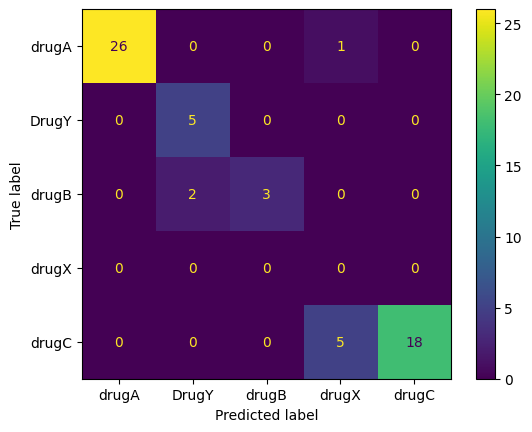

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['drugA', 'DrugY', 'drugB','drugX','drugC']
cmd=ConfusionMatrixDisplay(matr,display_labels=label)
cmd.plot()

**Classification Report.**

In [125]:
from sklearn.metrics import classification_report
rep=classification_report(y_pred,y_test)
print(rep)

              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        27
       drugA       0.71      1.00      0.83         5
       drugB       1.00      0.60      0.75         5
       drugC       0.00      0.00      0.00         0
       drugX       1.00      0.78      0.88        23

    accuracy                           0.87        60
   macro avg       0.74      0.67      0.69        60
weighted avg       0.98      0.87      0.91        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
